#**Image to Pencil Sketch with Python**

## **Grayscale Image:**

For a grayscale image, BackgroundTreshold is set to (0,0,0) by default  

## **Inverted Image:**

The image focussed directly on the retina of the eye is an inverted image.

## **Blurred image:**

If a blurred image is observed carefully then a common thing to notice is that image is smooth meaning edges are not observed.

In [60]:
import cv2
import warnings
import matplotlib.pyplot as plt
import numpy as np


warnings.filterwarnings("ignore")
%matplotlib inline
import cv2
from google.colab.patches import cv2_imshow

def rgb_to_grayscale(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray

def invert_image(image):
    inverted = cv2.bitwise_not(image)
    return inverted

def pencil_sketch(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    inverted = cv2.bitwise_not(gray)
    blurred = cv2.GaussianBlur(inverted, (111, 111), 0)
    inverted_blurred = cv2.bitwise_not(blurred)
    sketch = cv2.divide(gray, inverted_blurred, scale=256.0)
    return sketch


In [61]:
# Read the input image
input_image_path = '/content/BAT_DOG.jpg'
image = cv2.imread(input_image_path)

In [62]:
# Convert to grayscale
gray_image = rgb_to_grayscale(image)

# Invert the grayscale image
inverted_image = invert_image(gray_image)

# Create a pencil sketch
sketch_image = pencil_sketch(image)

Original image


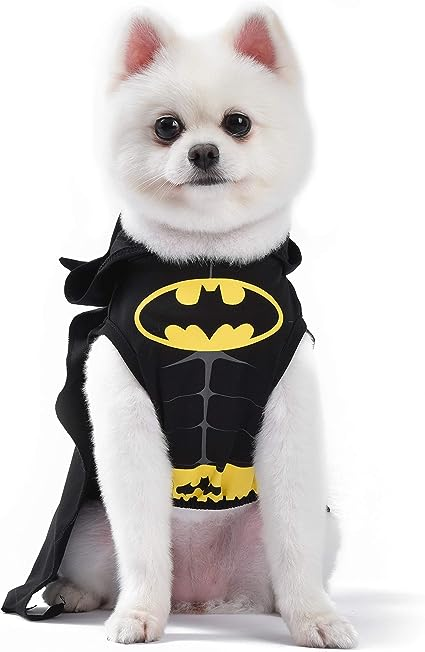

In [63]:
print('Original image')
cv2_imshow(image)

# convert to gray image

Grayscale Image


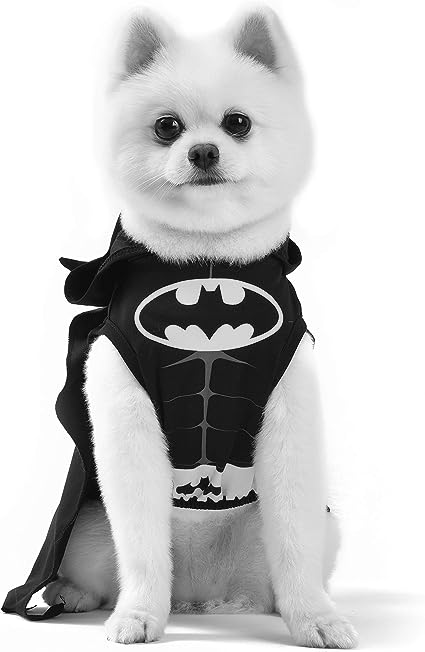

In [64]:
print('Grayscale Image')
cv2_imshow( gray_image)

# Get Inverted Image

Inverted Image


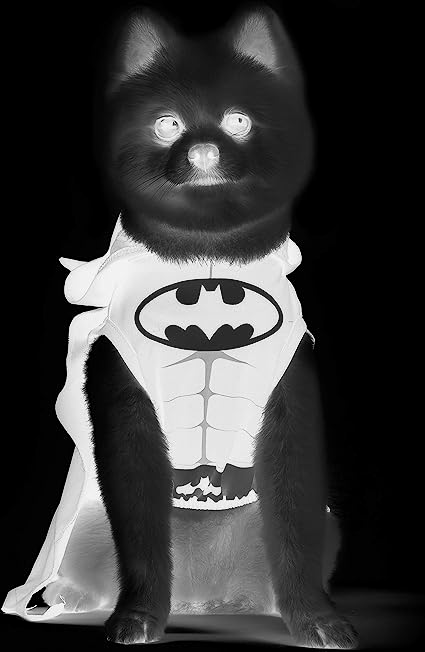

In [65]:
print('Inverted Image')
cv2_imshow( inverted_image)

#convert image to Blur

In [66]:
blurred = cv2.GaussianBlur(inverted_image, (21, 21), 0)

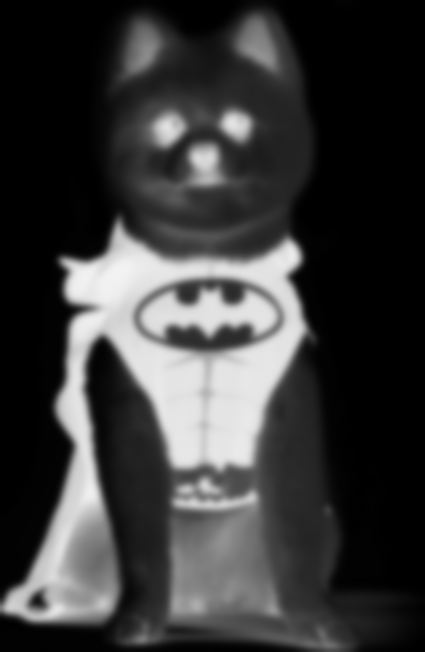

In [68]:
cv2_imshow(blurred)


Pencil Sketch


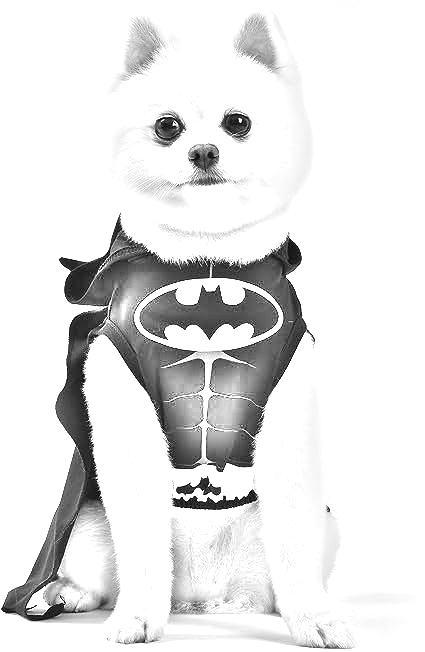

-1

In [69]:
print('Pencil Sketch')
cv2_imshow(sketch_image)
cv2.waitKey(0)


# **Origial image vs sketch image**

Origial image vs sketch image


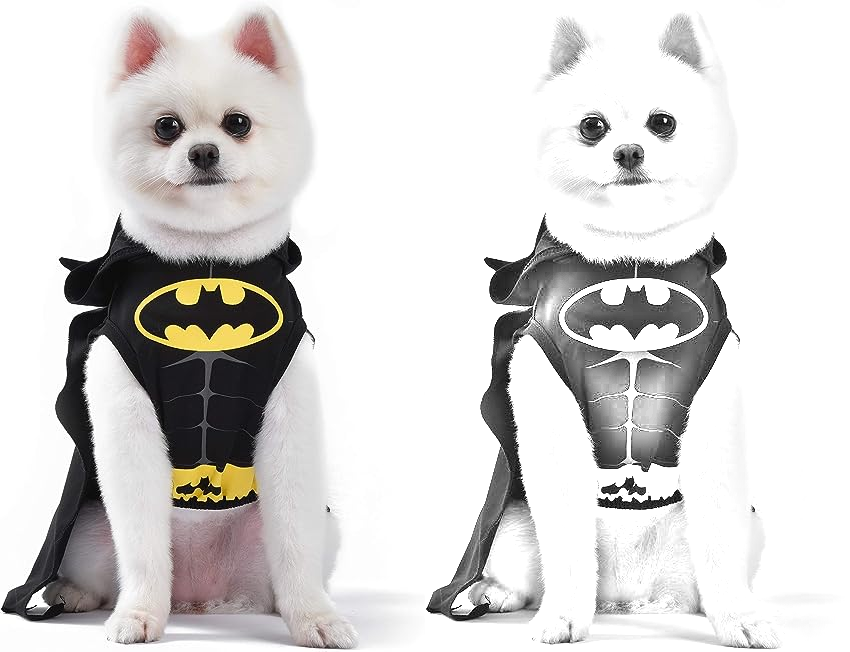

In [73]:
# Resize the sketch to match the size of the original image
sketch = cv2.resize(sketch_image, (image.shape[1],image.shape[0]))

# Create a horizontally stacked image for comparison
comparison = np.hstack((image, cv2.cvtColor(sketch, cv2.COLOR_GRAY2BGR)))

# Display the comparison
print('Origial image vs sketch image')
cv2_imshow(comparison)
cv2.waitKey(0)
cv2.destroyAllWindows()
